1) Load the data and remove unwanted columns.

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('Live_20210128.csv')

# Remove unnecessary columns
df = df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4', 'status_id', 'status_published'])

# Convert status_type to numerical values
df['status_type'] = df['status_type'].astype('category').cat.codes

# Standardize the dataset
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


/Users/marsson/anaconda3/envs/m1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/marsson/anaconda3/envs/m1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/marsson/anaconda3/envs/m1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/marsson/anaconda3/envs/m1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

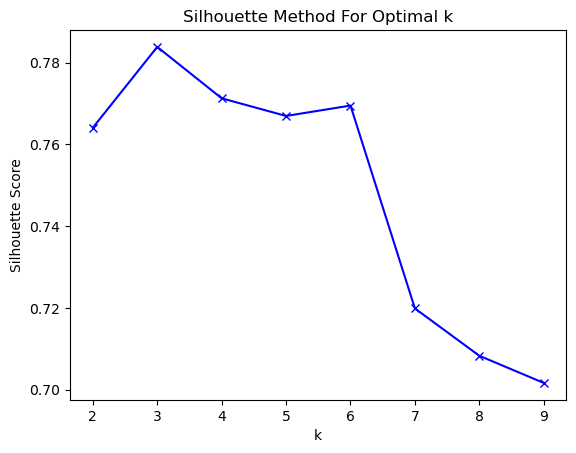

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sil = []
K = range(2, 10) # Assuming the range for K 

# Dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    labels = kmeans.labels_
    sil.append(silhouette_score(df, labels, metric='euclidean'))

plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()

3) Create clusters using Kmeans and Kmeans++ algorithms with optimal k value found in the previous problem. Report performances using appropriate evaluation metrics. Compare the results. 


In [5]:
# Get optimal k
optimal_k = K[sil.index(max(sil))]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, init='random', n_init=10, max_iter=300, random_state=42)
kmeans.fit(df)

# Perform KMeans++ clustering
kmeans_plus = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans_plus.fit(df)
print('K-means Inertia:', kmeans.inertia_)
print('K-means++ Inertia:', kmeans_plus.inertia_)


K-means Inertia: 54855.687456561776
K-means++ Inertia: 54852.325045478996
